In [ ]:
# #scratch
# !unzip "/content/Dataset Versions-20230508T065637Z-001.zip"
# !mv "/content/Dataset Versions/*" /content

#Preamble: Load the dataset and examine it.

### Notes:

* Maximum marks : 60

* This exam consists of a **CLASSIFICATION** problem.  

* The target is the '**satisfaction**' column.

* Random state should be taken as 64 wherever applicable.

* For NAT type of question if nothing is mentioned, Enter the answer accurately upto 3 decimal places.

* The dataset is already preprocessed, i.e. no missing values and numerical and categorical features are scaled/encoded accordingly.

###Q1. [marks : 0] Which dataset are you using for this exam?

Options:

A) V1

B) V2

C) V3

D) V4

E) V5


Answer:
V1: A, V2:B, V3: C, V4:D, V5:E

In [ ]:
rs = 64

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold

# Estimators
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
dataset = 'V5'
data = pd.read_csv(f'/content/Dataset Versions/{dataset}.csv')
# data = pd.read_csv(f"/content/gdrive/MyDrive/OPPE2 April 16/Dataset Versions/{dataset}.csv")

In [ ]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0.384615,0.067315,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.256410,0.088605,0.2,0.6,0.8,0.75,0.4,0.8,0.4,0.4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.320513,0.107867,0.2,0.2,0.2,0.00,0.8,0.8,0.8,0.8,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.384615,0.104015,0.6,0.6,0.6,0.50,0.8,0.6,0.8,0.8,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.217949,0.212693,1.0,0.0,1.0,0.00,0.2,1.0,1.0,0.2,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20718 non-null  float64
 1   Flight Distance                    20718 non-null  float64
 2   Inflight wifi service              20718 non-null  float64
 3   Departure/Arrival time convenient  20718 non-null  float64
 4   Ease of Online booking             20718 non-null  float64
 5   Gate location                      20718 non-null  float64
 6   Food and drink                     20718 non-null  float64
 7   Online boarding                    20718 non-null  float64
 8   Seat comfort                       20718 non-null  float64
 9   Inflight entertainment             20718 non-null  float64
 10  On-board service                   20718 non-null  float64
 11  Leg room service                   20718 non-null  flo

##Q2 [Marks =3] Break the dataset into features(`X`) and label (`y`), where the column `satisfaction` goes to `y` and the rest of the columns go to `X`. How many data points belonging to `satisfaction` value 1 are there in the dataset ? [NAT]

Answer:

V1: 8916

V2: 8969

V3: 9001

V4: 8899

V5: 8958


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
y.value_counts()

0.0    11760
1.0     8958
Name: satisfaction, dtype: int64

##Q3 [Marks : 3] Split the dataset into train and test dataset into the `80:20` ratio while keeping `random_state =64`. What is the shape of the training label vector(`y_train`) dataset?

(A) (20000,)

(B) (16574,27)

(C) (20024,14)

(D) (4522,98)

(E) (16574,)


Ans: E

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# print(X_train.shape)
#print(X_test.shape)
print(y_train.shape)
#print(y_test.shape)

(16574,)


##Q4 [4 marks][NAT] Take `LogisticRegression` estimator with following parameters for training:
  - Use `sag` as solver
  - Set random state to be equal to 64
  - Tolerance for stopping criteria to be 1e-3
  - Maximum number of iterations taken for the solvers to converge to be 100

Enter the recall score for the given model using test set(X_test, y_test)


V1: 0.843 (Range : 0.83 , 0.86)

V2: 0.829 (Range: 0.80 , 0.860)

V3: 0.840 (Range: 0.80 , 0.870)
  
V4: 0.820 (Range: 0.80 , 0.840)  
   
V5: 0.840 (Range: 0.81 , 0.880)


In [ ]:
logistic = LogisticRegression(solver='sag',
                              tol=1e-3,
                              max_iter=100,
                              random_state =64)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

recall_score(y_test,y_pred)

0.8405390230207749


# (Instruction for Question 5 and 6)

Instantiate a perceptron classifier with following parameters:-

-  Fit the intercept
-  Put warm start to be False
-  random_state=64



## Q5[Marks : 4][NAT] Fit this perceptron model with the training dataset and write the accuracy for the test data.

V1: 0.842 (range: 0.82,0.86)

V2: 0.821 (range: 0.80, 0.845)

V3: 0.842 (range: 0.82,0.86)

V4: 0.845 (range: 0.82, 0.87)

V5: 0.856 (range: 0.835, 0.88)

In [ ]:
clf = Perceptron(random_state=64,fit_intercept=True, warm_start=False)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8566602316602316

## Q6[Marks : 4]  [NAT] What is the value of bias (intercept) for the perceptron model you got (upto 1 decimal point) ?


Ans:

V1: -10.0

V2: -12.0

V3: -10.0

V4: -11.0

V5: -10.0


In [ ]:
clf.intercept_

array([-10.])

##Q 7  [6 marks] [NAT] Use  `SGDClassifier` on the training dataset (`X_train` and `y_train`) to train the model. Use the following parameters:

1. `log_loss`is the loss function to be used
2. apply ridge regularization,
3. maximum number of passes over the training data is 10
4. constant learning rate of 0.01,
5. regularization rate value is 0.001,
6. Take random_state=64.
7. Set warm_start as False

Note : Please ignore the convergence warning.

Using above model, calculate and write the correct value of f1_score for the test set.

Ans:

V1. 0.861 (Range: 0.850, 0.870)

V2: 0.845 (Range: 0.835, 0.855)

V3: 0.853 (Range: 0.810, 0.880)

V4: 0.832 (Range: 0.82, 0.840)

V5: 0.852 (Range: 0.840, 0.860)

#### New ranges

V1. 0.861 (Range: 0.850, 0.950)

V2: 0.845 (Range: 0.835, 0.94)

V3: 0.853 (Range: 0.810, 0.95)

V4: 0.832 (Range: 0.82, 0.94)

V5: 0.852 (Range: 0.840, 0.94)

In [ ]:
logistic_sgd = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.01,
                        alpha=0.001,
                        learning_rate='constant',
                        random_state=64)

logistic_sgd.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=10, random_state=64)

In [ ]:
f1_score(y_test,  logistic_sgd.predict(X_test))

0.8528916339135317

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_sgd.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2363
         1.0       0.85      0.85      0.85      1781

    accuracy                           0.87      4144
   macro avg       0.87      0.87      0.87      4144
weighted avg       0.87      0.87      0.87      4144





## Q8. [4 marks] [MCQ] Use Gridsearchcv with KNeighborsClassifier estimator, accuracy as scoring parameter, cv= 5. Consider [1,3,7,11] as K values to be examined.
* Consider following parameters for KNeighborsClassifier:

 - Take metric as 'minkowski',
 - Set P value as 2

- Keep other parameter values as default values.

What is the best value of K you obtained using the above instructions?

Options

A) 1

B) 3

C) 7

D) 11

Ans:

V1: C

V2: D

V3: C

V4: C

V5: C

In [ ]:
knn_clf = KNeighborsClassifier(metric = 'minkowski', p = 2)

gs_cv = GridSearchCV(knn_clf,
                  param_grid= {'n_neighbors':[1,3,7,11]},
                  scoring='accuracy',
                  cv=5)

gs_cv.fit(X_train,y_train)
gs_cv.best_params_

{'n_neighbors': 7}

# **(Common Instructions for Q9 to Q12)**

Take DecisionTreeClassifier(random_state = 64) estimator with GridSearchCV. Hyperparameter tuning to be done over the following parameters:

- Criterion as 'entropy' or 'gini'

- Splitter as 'random' or 'best'

- Minimum number of samples per leaf as [2,4,6,8,10]

- Maximum depth as [3,4,5,6]

- Use cross validation = 4


Use the best model from above hyper parameter turing process to answer following questions:

## Q9. [Marks: 4][NAT] Enter the value of the precision on the test set using the best model:

 Answer:

V1: 0.905 (Range : 0.89 ,0.93)

V2: 0.907 (Range: 0.89, 0.93)

V3: 0.928 (Range: 0.89, 0.94)
  
V4: 0.928 (Range: 0.89, 0.94)  
   
V5: 0.887  (Range: 0.840, 0.920)

In [ ]:

dt_clf = DecisionTreeClassifier(random_state = 64)

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'min_samples_leaf': [2,4,6,8,10],
          'max_depth':[3,4,5,6]}

# t=KFold(n_splits = 4, random_state = 64)
gscv = GridSearchCV(dt_clf,
                    params,
                    cv= 4,)

gscv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [ ]:
y_pred = gscv.best_estimator_.predict(X_test)
precision_score(y_test,y_pred)

0.8877495952509444

In [ ]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=64)

In [ ]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'splitter': 'best'}

## Q10:[Marks: 4] [MCQ] Enter the value of max_depth of the best estimator you got after training with GridSearchCV.

A) 3

B) 4

C) 5

D) 6

Answer: D (all versions)




In [ ]:
gscv.best_params_['max_depth']

6

## Q11[Marks: 4 ][NAT] Enter the value of min_samples_leaf of the best estimator after training with GridSearchCV.

A) 2

B) 4

C) 6

D) 8

E) 10


Answer:

V1: A

V2: C

V3: D
  
V4: E
   
V5: A

In [ ]:
gscv.best_params_['min_samples_leaf']

2

## Q12[Marks : 4] [NAT]  What is the number of nodes in the optimal tree?

Answer:

V1: 79

V2: 83

V3: 85
  
V4: 107   
   
V5: 81

In [ ]:
gscv.best_estimator_.tree_.node_count


81

## Q13. [Marks: 4 ][MCQ] Take RandomForestClassifier (random state to be 64) with GridSearchCV to tune the number of decision trees with the training set. The number of trees in forest can range from 5 to 10 (both inclusive). Mark the number of decision trees in the best estimator provided by the grid search.

A. 5

B. 6

C. 7

D. 8

E. 9

F. 10

Answer:

V1: E

V2: F

V3: F

V4: F

V5: F

In [ ]:
n_estimators = range(5,11)

param_grid = {"n_estimators":n_estimators}

rf_gs = GridSearchCV(RandomForestClassifier(random_state = 64),
                     param_grid = param_grid)
rf_gs.fit(X_train,y_train)

rf_gs.best_params_

{'n_estimators': 10}

# **(Common Instructions for Q14,Q15)**
##Take an adaboost model with following hyperparameter values and tune it using GridsearchCV.

- Use n_estimators as [10,20,30]
- random_state = 64
- Use learning_rate as [0.5,1,2]
- Take cv value= 5




## Q14[Marks: 3] [NAT] Train the 'model' using above instructions and use the best estimator to calculate the total number of misclassified samples for the test data and submit the value.

Answer:

V1: 322   (Range: 318,325)

V2: 326  (Range: 322,330)

V3: 286  (Range: 282, 291)
  
V4: 310  (Range: 305,315)  
   
V5: 330  (Range: 325, 335)

In [ ]:

params = {'n_estimators':[10,20,30],
          'learning_rate':[0.5,1,2]}
adc = AdaBoostClassifier(random_state = 64)
gscv_ab = GridSearchCV(adc,
                       params,
                       cv=5)

gscv_ab.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=64),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [10, 20, 30]})

In [ ]:
cm = confusion_matrix(y_test, gscv_ab.best_estimator_.predict(X_test))
cm[0][1] + cm[1][0]

330

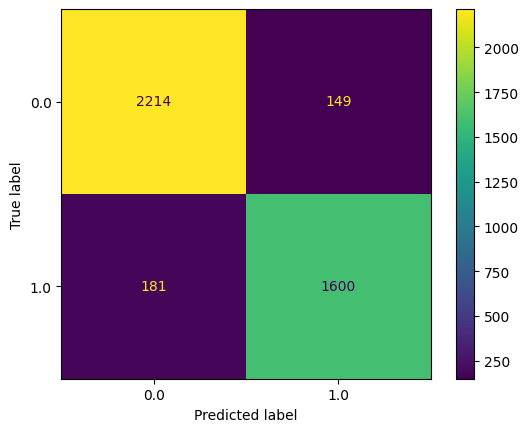

In [ ]:
ConfusionMatrixDisplay.from_estimator(gscv_ab.best_estimator_, X_test,y_test)

## Q15[Marks: 3] Mark  the value of `n_estimators` of the best model after training with GridSearchCV. [MCQ]

Options:

A) 10

B) 20

C) 30

D) None of these

Answer: C (all versions)

In [ ]:
gscv_ab.best_params_

{'learning_rate': 0.5, 'n_estimators': 30}

## Q16 [6 marks] Apply `GridSearchCV` using the support vector machine (SVM) classifier on the training dataset `X_train, y_train` and calculate the best value of `C` and `kernel` from the values below.

####use below hyperparameter values to tune the mode
* `kernel':['linear', 'rbf'],
* 'C':[1, 10]`)

Which of the following options represent the best parameters?

options:

A. {'C': 1, 'kernel': 'rbf'}

B. {'C': 10, 'kernel': 'rbf'}

C. {'C':  1, 'kernel': 'linear'}

D. {'C': 10, 'kernel': 'linear'}


Answer: B


In [ ]:
param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVC(random_state=64)

gs = GridSearchCV(svc, param_grid)

gs.fit(X_train, y_train)

gs.best_params_

{'C': 10, 'kernel': 'rbf'}